In [1]:
%load_ext autoreload
%autoreload 2

### 2. Test the Foward part of the Network
> * Now make sure that we can map from an image into an SxSx2x11 Tensor
> * First make sure that the Yolo2 weights are loadable and make sense.

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from Model.vis_utils import visualize_grid

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# l2 = np.array(list((yolo_weights['model_weights']['conv2d_1']['conv2d_1'][u'kernel:0'])))
# grid = visualize_grid(l2.transpose(3, 1, 2, 0))
# print (grid.shape, l2.shape)
# plt.imshow(grid.astype('uint8'))
# plt.axis('off')
# plt.gcf().set_size_inches(5, 5)
# plt.show()

#### 2.1 Overfit Localizer in Tiny Data
> * For debugging, we run the foward, and backward pass for `a few`
epochs.

In [4]:
import torch
print(torch.__version__)
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from Model.dataloader import NutritionDataset
from Model.net import LocalizerNet
from train import train_localizer, calculate_iou

0.4.0


In [5]:
def train_localizer_network():
    IMAGE_DIR = '../Data/FullData/RawImages/'
    BOXES = '../Data/FullData/BoundingBoxes.npy'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    YOLO_PATH = '../Data/FullData/yolo.h5'
    debug = not torch.cuda.is_available()
    dataset = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, debug=debug),
        batch_size=128, shuffle=True, num_workers=16,
    )
    dev = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, split='dev', debug=debug),
        batch_size=128, shuffle=True, num_workers=16,
    )
    model = LocalizerNet(YOLO_PATH, use_full_yolo=True)
    optimizer = torch.optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=1.04e-4
    )
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [25, 50, 75, 95])
    r = train_localizer(
        model, optimizer, dataset, dev, epochs=100, 
        scheduler=scheduler, restore=False
    )
    return r    

In [6]:
train_losses, dev_losses, train_map, dev_map = train_localizer_network()

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.289645791053772
	 Dev Loss =  0.40726788341999054
	 Train mAP =  [0.125 0.125 0.    0.   ]
	 Dev mAP =  [0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.14870920777320862
	 Dev Loss =  0.3653957359492779
	 Train mAP =  [0.20137363 0.10082418 0.04807692 0.01923077]
	 Dev mAP =  [0.07724896 0.0383055  0.02604167 0.02604167]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.06893663853406906
	 Dev Loss =  0.3975752592086792
	 Train mAP =  [0.61111111 0.40656566 0.15151515 0.04040404]
	 Dev mAP =  [0.04897993 0.02872744 0.02195661 0.02195661]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.03362016752362251
	 Dev Loss =  0.43353094160556793
	 Train mAP =  [0.76379155 0.61716083 0.37057502 0.1237646 ]
	 Dev mAP =  [0.04584002 0.02481061 0.02291667 0.02291667]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.027177777141332626
	 Dev Loss =  0.45763176307082176
	 Train mAP =  [0.79594689 0.6280573  0.40828092 0.11740042]
	 Dev mAP =  [0.02353767 0.00484575 0.00315657 0.00142045]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.01975668966770172
	 Dev Loss =  0.4734134189784527
	 Train mAP =  [0.83880042 0.66764757 0.45823957 0.229704  ]
	 Dev mAP =  [0.04589945 0.02338435 0.02210884 0.01169218]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.01630241423845291
	 Dev Loss =  0.48030584305524826
	 Train mAP =  [0.82363732 0.65138015 0.42260657 0.1833508 ]
	 Dev mAP =  [0.02709056 0.01445815 0.01164596 0.01028727]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.017484644427895546
	 Dev Loss =  0.477016594260931
	 Train mAP =  [0.82225275 0.60673077 0.40563187 0.12884615]
	 Dev mAP =  [0.03912794 0.02736586 0.00753023 0.00753023]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.015246490947902203
	 Dev Loss =  0.47769343852996826
	 Train mAP =  [0.88598131 0.7294615  0.44147753 0.13128616]
	 Dev mAP =  [0.02383803 0.01168517 0.0076087  0.0076087 ]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.013953383080661297
	 Dev Loss =  0.47960498556494713
	 Train mAP =  [0.9066278  0.74359084 0.50265798 0.20252079]
	 Dev mAP =  [0.03854459 0.02791981 0.01928864 0.01488117]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.014010571874678135
	 Dev Loss =  0.47638997435569763
	 Train mAP =  [0.84739212 0.68582229 0.43233945 0.18832824]
	 Dev mAP =  [0.05307406 0.0256413  0.02205097 0.0104769 ]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.014656027778983116
	 Dev Loss =  0.4663793481886387
	 Train mAP =  [0.82238752 0.66944848 0.46952104 0.15647678]
	 Dev mAP =  [0.03723399 0.01335586 0.01166667 0.01166667]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.013500014320015907
	 Dev Loss =  0.4576374180614948
	 Train mAP =  [0.83486239 0.67431193 0.49541284 0.16972477]
	 Dev mAP =  [0.04398476 0.02206363 0.0103965  0.0103965 ]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.012307066470384598
	 Dev Loss =  0.4643120504915714
	 Train mAP =  [0.84120803 0.70599688 0.51523018 0.2226549 ]
	 Dev mAP =  [0.04301845 0.02549704 0.0217345  0.00463599]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.010225251317024231
	 Dev Loss =  0.4509087838232517
	 Train mAP =  [0.90654206 0.78997685 0.57189402 0.28127411]
	 Dev mAP =  [0.06219757 0.04457382 0.03403361 0.03280812]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.010436652228236198
	 Dev Loss =  0.44480491802096367
	 Train mAP =  [0.87520485 0.73815962 0.48885611 0.21484759]
	 Dev mAP =  [0.08036669 0.0661624  0.04544534 0.0442661 ]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.009970762766897678
	 Dev Loss =  0.43479298055171967
	 Train mAP =  [0.93457944 0.75678893 0.51736907 0.24925057]
	 Dev mAP =  [0.03722788 0.02168702 0.00371719 0.00371719]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.009000272490084171
	 Dev Loss =  0.43042635172605515
	 Train mAP =  [0.93466518 0.78080254 0.56263397 0.23964675]
	 Dev mAP =  [0.06907298 0.03995011 0.02624819 0.02624819]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.008756738156080246
	 Dev Loss =  0.42831403762102127
	 Train mAP =  [0.87875956 0.79490229 0.55458794 0.23827528]
	 Dev mAP =  [0.06802041 0.04638416 0.03470193 0.02845193]


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.00879740435630083
	 Dev Loss =  0.43201420083642006
	 Train mAP =  [0.89622642 0.77358491 0.57075472 0.24056604]
	 Dev mAP =  [0.06049217 0.04406106 0.03041667 0.02416667]


In [7]:
def plot(train, dev, title):
    plt.title(title)
    plt.plot(train, label='train'); plt.plot(dev, label='dev')
    plt.xlabel('Iteration')
    plt.legend()
    plt.show()

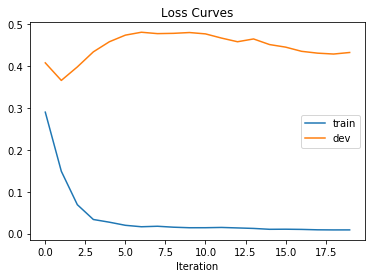

In [8]:
plot(train_losses, dev_losses, title='Loss Curves')

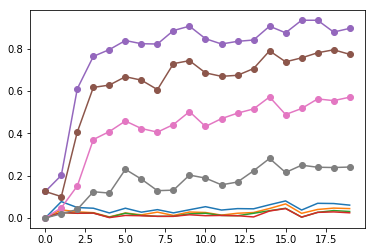

In [9]:
plt.plot(dev_map)
plt.plot(train_map, '-o')
# plt.savefig('goals2.png')

In [ ]:
def calculate_mean_image():
    '''
    calculate the mean image on the training set at 
    different sizes, (270, 480) and (540, 960)
    '''
    IMAGE_DIR = '../Data/FullData/RawImages/'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    image_paths = [os.path.join(IMAGE_DIR, f) for f in np.load(DATA_PATH).item()['train']]
    mean_270, mean_540 = np.zeros((480, 270, 3)), np.zeros((960, 540, 3))
    for img in tqdm(image_paths):
        mean_270 += resized_image((1080//4, 1920//4), img)
        mean_540 += resized_image((1080//2, 1920//2), img)
    N = len(image_paths)
    return mean_270 / N, mean_540 / N

def resized_image(size, path):
    with Image.open(path) as img:
        img = img.resize(size, resample=Image.BILINEAR)
        img = np.asarray(img)
    return img

In [8]:
# # s, l = calculate_mean_image()
# mean_image_s, mean_image_l = (
#     Image.fromarray(s.astype('uint8'), 'RGB'), 
#     Image.fromarray(l.astype('uint8'), 'RGB')
# )